# Final Project: A  automatic approach to spike sorting

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

In [101]:
# Enter link here.
#https://github.com/CHT2016/final-project/blob/master/

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [102]:
#Import all necessary materials for Data Analysis 
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np 
import matplotlib.pyplot as plt

In [103]:
#Read in the data to a Pandas DataFame
waveform = pd.read_csv("channel_383_waveforms.csv")

In [104]:
# the head of the data, each line presents a waveform
waveform.head()

,Points1,Points2,Points3,Points4,Points5,Points6,Points7,Points8,Points9,Points10,...,Points43,Points44,Points45,Points46,Points47,Points48,Points49,Points50,Points51,Points52
0,-9.0,-23.6,-30.4,-28.8,-24.6,-16.0,-6.0,4.8,10.2,14.4,...,-5.8,-16.0,-18.0,-26.0,-28.4,-26.0,-26.6,-29.8,-33.8,-36.0
1,-56.6,-52.2,-46.4,-44.8,-35.4,-32.0,-36.8,-31.4,-31.2,-32.0,...,12.2,7.6,8.0,-0.8,-11.6,-9.2,1.6,2.6,4.0,2.0
2,-0.6,0.4,3.2,9.4,11.6,3.8,-2.8,-8.0,-14.8,-9.8,...,30.8,31.0,29.4,20.6,20.0,23.8,22.6,9.6,-1.6,-8.6
3,-13.0,-11.0,-5.8,-10.4,-7.2,0.0,8.2,12.6,11.0,5.4,...,-4.2,-7.2,-6.2,-4.0,-10.2,-13.8,-18.8,-24.2,-15.6,-11.8
4,-2.6,0.2,1.4,0.6,-3.8,-4.8,2.8,5.0,3.2,4.2,...,18.2,9.0,5.2,8.6,11.8,9.4,8.0,3.4,-0.4,-2.2


In [105]:
# the shape of the data
waveform.shape

(75785, 52)

In [106]:
# define the matrix
X = waveform.values;

# define x-axis: ms
x = np.linspace(0/40, 51/40,52) # sample_frequency = 40K Hz (points per sec)

# ranmdom select unsorted wavefor to show
a=len(waveform)
random_list = np.random.randint(0,a,300)
# print(random_list)

Text(0, 0.5, 'voltage (mV)')

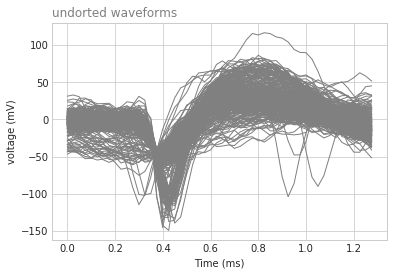

In [107]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# multiple line plot
fig = plt.figure()
ax = plt.axes()

for row in random_list:
    plt.plot(x, X[row,:], linewidth=1,color='gray')
    
# Add title & axis labels
plt.title("undorted waveforms", loc='left', fontsize=12, fontweight=0, color='gray')
plt.legend('')
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")

##  4) PCA Projection to 2D

In [108]:
# necessary materials for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [109]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [110]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [111]:
principalDf.head(5)

,principal component 1,principal component 2
0,94.979039,-92.025717
1,-32.359500,75.351401
2,-4.015996,50.816331
3,16.717371,-53.700856
4,-68.069266,-5.126346


# Visualize 2D Projection
Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

In [112]:
# ranmdom select unsorted wavefor to show
random_list2 = np.random.randint(0,a,5000)

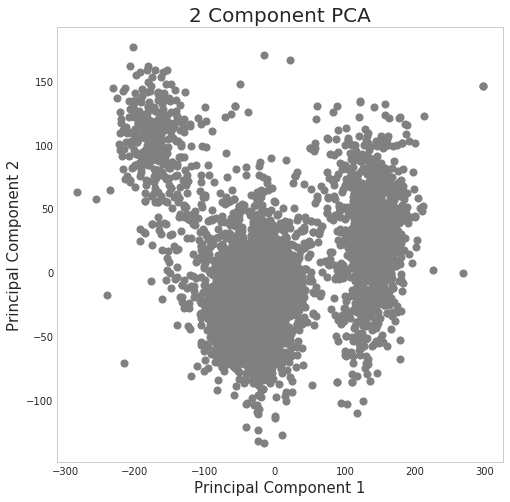

In [130]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.scatter(principalDf.loc[random_list2, 'principal component 1']
               , principalDf.loc[random_list2, 'principal component 2']
               , c = 'gray'
               , s = 50)
ax.grid()

In [114]:
# how much information (variance) can be attributed to each of the principal components.
pca.explained_variance_ratio_

array([0.58248564, 0.16643878])

### Clustering: K-means
K-Means (most popular) algorithm. Iterative, multi-step

Step 1: Choose centroids

Step 2: Assign clusters

In [115]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=3,
    init='k-means++', # default, also: random
    n_init=10, # default, also: 5, 1
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
# model.fit(iris)
cluster_labels = model.fit_predict(principalDf)
print(cluster_labels)

[1 0 0 ... 1 1 2]


In [116]:
cluster_labels.shape

(75785,)

In [117]:
def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

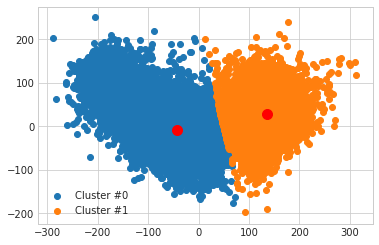

In [118]:
model = KMeans(
    n_clusters=2,
    init="k-means++", #'k-means++', # default, also: random
    n_init=100, # default, also: 20, 5, 1
    max_iter=100, # default / 1
)
model.fit(principalDf)
cluster_labels = model.predict(principalDf)
plot_kmeans(principalDf, cluster_labels, model, 2)

### Determine number of clusters: The Elbow Method
One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

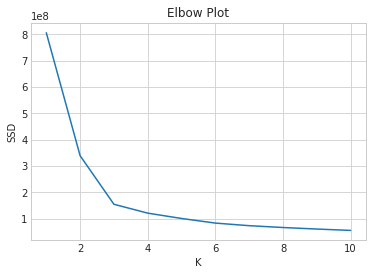

In [119]:
def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(principalDf, 10)

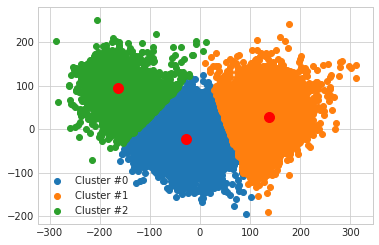

In [120]:
model = KMeans(n_clusters=3)
cluster_labels =model.fit_predict(principalDf)
plot_kmeans(principalDf, cluster_labels, model, 3)

Text(0, 0.5, 'voltage (mV)')

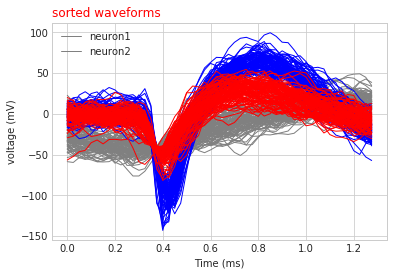

In [128]:
colors = ['red', 'blue', 'gray']

# multiple line plot
fig = plt.figure()
ax = plt.axes()
for cluster_idx in range(2,-1,-1):
        b=np.arange(len(cluster_labels))
        ind=b[cluster_labels== cluster_idx]
       # ax = fig.add_subplot(1,3,cluster_idx+1) 
        for row in ind[0:100]:
            plt.plot(x, X[row,:], linewidth=1,c=colors[cluster_idx])
    
# Add title & axis labels
plt.title("sorted waveforms", loc='left', fontsize=12, fontweight=0, color='red')
plt.legend({'neuron1','neuron2',})
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")

Text(0, 0.5, 'voltage (mV)')

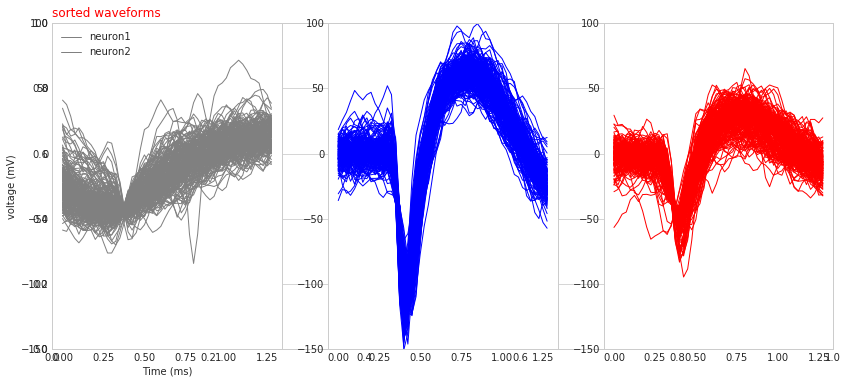

In [153]:
# multiple line plot
fig = plt.figure(figsize = (14,6))
ax = plt.axes()
for cluster_idx in range(3):
    b=np.arange(len(cluster_labels))
    ind=b[cluster_labels== cluster_idx]
    ax = fig.add_subplot(1,3,3-cluster_idx) 
    ax.grid()
    for row in ind[0:200]:
        plt.plot(x, X[row,:], linewidth=1,c=colors[cluster_idx])
    plt.ylim((-150,100))
    
# Add title & axis labels
plt.title("sorted waveforms", loc='left', fontsize=12, fontweight=0, color='red')
plt.legend({'neuron1','neuron2',})
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")